**Goal**
!!! note
This study aims to analyze the interannual impacts of the El Niño–Southern Oscillation (ENSO) on tropical terrestrial carbon flux (GPP), with a particular focus on whether geoengineering can effectively reduce the negative sensitivity of land carbon uptake under future high CO₂ conditions.
We investigate how tropical terrestrial carbon flux (within 40°S–40°N) responds to ENSO events across three climate scenarios—preindustrial, high-CO₂ warming, and SRM (solar radiation management)—and further explore the possible causes behind these differences.

Data used

The data used in this project come from the Canadian Earth System Model (CanESM5) within the Coupled Model Intercomparison Project Phase 6 (CMIP6).
Three standard climate scenarios were analyzed:

piControl (preindustrial control scenario): Represents the natural climate state before the Industrial Revolution, with constant CO₂ concentration.

abrupt-4×CO₂ (high-CO₂ warming scenario): Atmospheric CO₂ concentration is instantaneously increased to four times the preindustrial level and then held constant, representing strong global warming under sustained high CO₂ conditions.

G1 (SRM cooling scenario): Based on the 4×CO₂ setting, incoming solar radiation is artificially reduced to bring global mean temperature back to preindustrial levels, representing a form of geoengineering known as Solar Radiation Management (SRM).

The model simulations cover about 50 years (approximately 1890–1949). All data were regridded to a uniform 1°×1° spatial resolution, focusing on the tropical land region (40°S–40°N).

The planned analysis

ENSO index calculation and visualization:
Calculate the standardized ENSO index (DJF Niño3.4 sea surface temperature anomaly) and plot its interannual time series to compare ENSO intensity and frequency under the three climate scenarios.

Visualization of tropical GPP interannual variations:
Plot the annual variations of tropical terrestrial carbon flux (GPP) for the three scenarios to visually show the differences in interannual fluctuations.

Calculation and comparison of GPP sensitivity to ENSO:
Quantify and visualize the sensitivity of tropical GPP to ENSO events (using linear regression coefficients) and perform statistical significance tests to highlight differences among the three scenarios.

Spatial distribution analysis of sensitivity:
Map the spatial distribution of GPP sensitivity to ENSO to reveal which regions are most affected under each scenario.

Attribution analysis:
Further analyze the contributions of temperature and precipitation changes to variations in GPP sensitivity, aiming to understand the underlying mechanisms driving the ENSO–GPP relationship in the SRM scenario.

In [1]:
import sys
print(sys.executable)

# ======== Import libraries ========
import numpy as np
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
import cartopy.crs as ccrs
from matplotlib import gridspec


D:\miniconda\envs\research\python.exe


In [2]:


# Set path to the data directory (adjust as needed)
data_dir = Path(r'D:\cangku\data')

# List of NetCDF files to analyze
nc_files = [
    'gpp_CanESM5_abrupt-4xCO2_185001-194912_1x1.nc',
    'gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1.nc',
    'gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012.nc',
    'gpp_Lmon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc',
    'gpp_Lmon_CanESM5_piControl_r1i1p2f1_gn_185001-194912.nc',
    "tos_Omon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012.nc",
    "tos_Omon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc",
    "tos_Omon_CanESM5_piControl_r1i1p2f1_gn_185001-194912.nc",
    'tas_Amon_CanESM5_abrupt-4xCO2_185001-200012.nc',
    'tas_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc',
    'pr_Amon_CanESM5_abrupt-4xCO2_185001-200012.nc',
    'pr_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc',
]

In [3]:
# 自动识别经纬度变量名，方便后续处理数据
def find_lat_lon_names(ds):
    lat_name, lon_name = None, None
    for candidate in ['lat', 'latitude', 'nav_lat', 'y']:
        if candidate in ds.variables:
            lat_name = candidate
            break
    for candidate in ['lon', 'longitude', 'nav_lon', 'x']:
        if candidate in ds.variables:
            lon_name = candidate
            break
    if lat_name is None or lon_name is None:
        raise ValueError('无法自动识别经纬度变量名')
    return lat_name, lon_name

In [4]:
# 定义读取数据的函数
def summarize_dataset(file_path):
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    with xr.open_dataset(file_path, decode_times=time_coder) as ds:
        lat_name, lon_name = find_lat_lon_names(ds) #，能读取数据中的一维坐标(gpp,tas,pr)和二维坐标(tos)

        lat = ds[lat_name]
        lon = ds[lon_name]
        time = ds['time']

        print(f'File: {file_path.name}')
        print(f'  Latitude dimensions: {lat.shape}')
        print(f'  Longitude dimensions: {lon.shape}')
        print(f'  Time dimension length: {time.size}')
        print(f'  Time range: {str(time.values[0])} to {str(time.values[-1])}')
        print('-' * 50)

In [5]:
# Check each NetCDF file and print a short summary
print("11")
for filename in nc_files:
    path = data_dir / filename
    if path.exists():
        try:
            summarize_dataset(path)
        except Exception:
            print(f'Failed to read {filename}. Please verify the file content.')
    else:
        print(f'{filename} not found in the data directory.')

11
File: gpp_CanESM5_abrupt-4xCO2_185001-194912_1x1.nc
  Latitude dimensions: (180,)
  Longitude dimensions: (360,)
  Time dimension length: 1200
  Time range: 1850-01-16 12:00:00 to 1949-12-16 12:00:00
--------------------------------------------------
File: gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1.nc
  Latitude dimensions: (180,)
  Longitude dimensions: (360,)
  Time dimension length: 1812
  Time range: 1850-01-16 12:00:00 to 2000-12-16 12:00:00
--------------------------------------------------
File: gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012.nc
  Latitude dimensions: (64,)
  Longitude dimensions: (128,)
  Time dimension length: 1812
  Time range: 1850-01-16 12:00:00 to 2000-12-16 12:00:00
--------------------------------------------------
File: gpp_Lmon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc
  Latitude dimensions: (64,)
  Longitude dimensions: (128,)
  Time dimension length: 1200
  Time range: 1850-01-16 12:00:00 to 1949-12-16 12:00:00
-------------

插值

In [6]:
# 目标插值网格 (1° × 1°)
lon_target = np.arange(0, 360, 1)
lat_target = np.arange(-90, 90, 1)

In [7]:
def fix_lon(lon):
    return lon % 360

def standardize_coords(ds):
    # 统一经纬度变量名
    for lat_name in ['lat', 'latitude', 'nav_lat', 'y']:
        if lat_name in ds:
            ds = ds.rename({lat_name: 'lat'})
            break
    for lon_name in ['lon', 'longitude', 'nav_lon', 'x']:
        if lon_name in ds:
            ds = ds.rename({lon_name: 'lon'})
            break

    # 若是二维经纬度（如tos），简化为规则一维网格
    if ds['lon'].ndim == 2 and ds['lat'].ndim == 2:
        lat_1d = ds['lat'][:, 0].values
        lon_1d = ds['lon'][0, :].values
        lon_1d = fix_lon(lon_1d)
        ds = ds.drop_vars(['lon', 'lat'], errors='ignore')
        ds = ds.rename({'j': 'lat', 'i': 'lon'})
        ds = ds.assign_coords(lon=lon_1d, lat=lat_1d)

    ds['lon'] = fix_lon(ds['lon'])
    return ds.sortby('lon')

In [8]:
#单个文件插值 
def regrid(file):
    with xr.open_dataset(file) as ds:
        var = file.name.split('_')[0]
        if var not in ds:
            var = list(ds.data_vars)[0] # 依次识别变量名（ gpp, tos, tas, pr）

        ds = ds[[var, 'time']]
        ds = standardize_coords(ds)

        ds_interp = ds.interp(lon=lon_target, lat=lat_target, method='linear')

        out_file = file.with_name(file.stem + '_1x1.nc') #输出文件
        ds_interp.to_netcdf(out_file)

        print(f'Finished: {file.name} → {out_file.name}')

In [9]:
#批量插值 
data_dir = Path(r'D:\cangku\data')
files = [
    'gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012.nc',
    'gpp_Lmon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc',
    'gpp_Lmon_CanESM5_piControl_r1i1p2f1_gn_185001-194912.nc',
    'tos_Omon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012.nc',
    'tos_Omon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc',
    'tos_Omon_CanESM5_piControl_r1i1p2f1_gn_185001-194912.nc',
    'tas_Amon_CanESM5_abrupt-4xCO2_185001-200012.nc',
    'tas_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc',
    'pr_Amon_CanESM5_abrupt-4xCO2_185001-200012.nc',
    'pr_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc',
]

for f in files:
    file_path = data_dir / f
    if file_path.exists():
        try:
            regrid(file_path)
        except Exception as e:
            print(f'Error: {f}, {e}') #如果在 regrid 过程中发生任何错误,打印错误信息但不中断整个循环
    else:
        print(f'File not found: {f}')

Finished: gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012.nc → gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1.nc
Finished: gpp_Lmon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc → gpp_Lmon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1.nc
Finished: gpp_Lmon_CanESM5_piControl_r1i1p2f1_gn_185001-194912.nc → gpp_Lmon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1.nc
Finished: tos_Omon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012.nc → tos_Omon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1.nc
Finished: tos_Omon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc → tos_Omon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1.nc
Finished: tos_Omon_CanESM5_piControl_r1i1p2f1_gn_185001-194912.nc → tos_Omon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1.nc
Finished: tas_Amon_CanESM5_abrupt-4xCO2_185001-200012.nc → tas_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1.nc
Finished: tas_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912.nc → tas_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1.nc
Finished: pr_Amon_CanESM

detrend

In [10]:
#读取插值为1x1的文件

input_files = [
    'gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1.nc',
    'gpp_Lmon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1.nc',
    'gpp_Lmon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1.nc',
    'tos_Omon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1.nc',
    'tos_Omon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1.nc',
    'tos_Omon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1.nc',
    'tas_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1.nc',
    'tas_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1.nc',
    'pr_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1.nc',
    'pr_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1.nc',
]

In [11]:
#定义去趋势函数，对三维气候数据 (time, lat, lon) 逐经纬度格点去除线性趋势。
def detrend_3d(data):
    t, nlat, nlon = data.shape
    time_index = np.arange(t)
    out = np.full_like(data, np.nan)

    for i in range(nlat):
        for j in range(nlon):
            y = data[:, i, j]
            if np.isfinite(y).sum() < 2:
                continue
            p = np.polyfit(time_index, y, 1) #用最小二乘法 拟合线性模型
            out[:, i, j] = y - np.polyval(p, time_index)

    return out

# 依次对变量进行去趋势（gpp, tos, tas, pr）
# 去趋势时间段为1890–1949年

def process_one(path):
    with xr.open_dataset(path) as ds:
        var = next((v for v in ['gpp', 'tos', 'tas', 'pr'] if v in ds), None)
        if not var:
            print(f'Skipped {path.name}, main variable not found.')
            return

        da = ds[var].sel(time=slice('1890-01', '1949-12')).astype('float64')
        detrended = detrend_3d(da.values)

        da_dt = xr.DataArray(
            detrended, coords=da.coords, dims=da.dims, name=var, attrs=da.attrs
        )

        out_path = path.with_name(path.stem + '_1890-1949_detrend.nc')
        da_dt.to_netcdf(out_path)
        print(f'Finished: {path.name} → {out_path.name}')

In [12]:
# 依次对每个文件执行去趋势处理
for fname in input_files:
    path = data_dir / fname
    if path.exists():
        try:
            process_one(path)
        except Exception as e:
            print(f'Error processing {fname}: {e}')
    else:
        print(f'File not found: {fname}')

Finished: gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1.nc → gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1_1890-1949_detrend.nc
Finished: gpp_Lmon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1.nc → gpp_Lmon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc
Finished: gpp_Lmon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1.nc → gpp_Lmon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc
Finished: tos_Omon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1.nc → tos_Omon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1_1890-1949_detrend.nc
Finished: tos_Omon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1.nc → tos_Omon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc
Finished: tos_Omon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1.nc → tos_Omon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc
Finished: tas_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1.nc → tas_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1_1890-

**ENSO指数计算与可视化**


In [57]:

DATA_DIR = Path(r"D:\cangku\data")

FILES = {
    "abrupt-4xCO2": "tos_Omon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1_1890-1949_detrend.nc",
    "G1": "tos_Omon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc",
    "piControl": "tos_Omon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc",
}

#定义的 纬度、经度范围 截取 Niño3.4 区域。
lat_bounds = (-5, 5)
lon_bounds = (190, 240)

In [41]:
#定义计算ENSO指数的函数
def calc_djf_index(ds):
    tos = ds["tos"]
    tos_sel = tos.sel(lat=slice(*lat_bounds), lon=slice(*lon_bounds))
    tos_mean = tos_sel.mean(dim=("lat", "lon"))

    # DJF season mean
    djf = tos_mean.rolling(time=3, center=True).mean()
    djf = djf.sel(time=djf["time.month"] == 1)
    djf = djf.sel(time=slice("1890-01-01", "1949-12-31"))

    values = djf.values
    values = (values - np.nanmean(values)) / np.nanstd(values)#ENSO 指数标准化
    return values, djf["time"].dt.year.values

ENSO_index = np.zeros((3, 60))
years = None
for k, fname in enumerate(FILES.values()):
    ds = xr.open_dataset(DATA_DIR / fname)
    values, yrs = calc_djf_index(ds)
    ENSO_index[k, :] = values
    if years is None:
        years = yrs
    ds.close()

print("ENSO_index shape:", ENSO_index.shape)

ENSO_index shape: (3, 60)


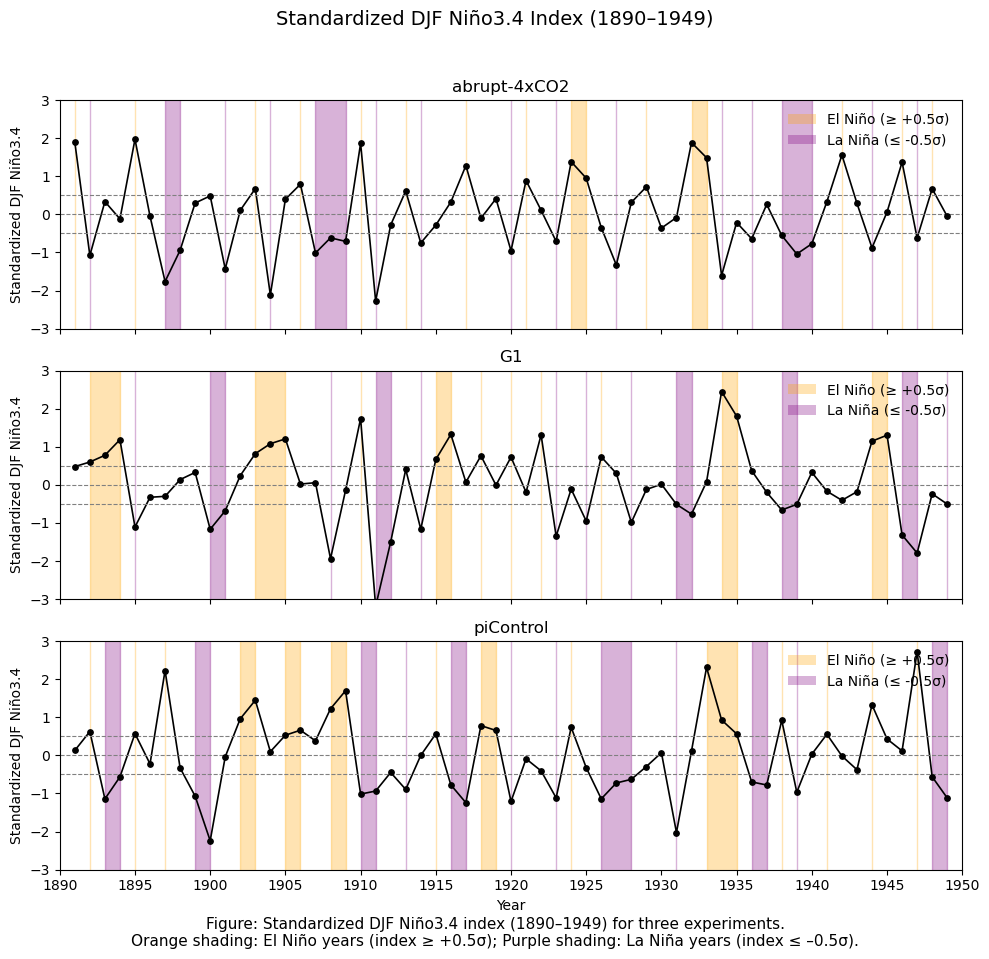

In [42]:




# ===== draw picture =====
fig, axes = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

for i, (exp, fname) in enumerate(FILES.items()):
    ax = axes[i]
    vals = ENSO_index[i, :]

    # ENSO 指数 ≥ +0.5σ → El Niño（暖事件）
    # ENSO 指数 ≤ -0.5σ → La Niña（冷事件）
    ax.fill_between(years, -5, 5, where=vals > 0.5, color="orange", alpha=0.3)
    ax.fill_between(years, -5, 5, where=vals < -0.5, color="purple", alpha=0.3)

    ax.plot(years, vals, color="black", linewidth=1.2)
    ax.scatter(years, vals, color="black", s=15, zorder=3)

    # 添加参考线：y=0 表示气候平衡状态，±0.5 为 ENSO 阈值
    ax.axhline(0, color="gray", linewidth=0.8, linestyle="--")
    ax.axhline(0.5, color="gray", linewidth=0.8, linestyle="--")
    ax.axhline(-0.5, color="gray", linewidth=0.8, linestyle="--")

    ax.set_ylim(-3, 3)
    ax.set_ylabel("Standardized DJF Niño3.4")
    ax.set_title(exp)

    # legend
    legend_handles = [
        Patch(facecolor="orange", alpha=0.3, label="El Niño (≥ +0.5σ)"),
        Patch(facecolor="purple", alpha=0.3, label="La Niña (≤ -0.5σ)")
    ]
    ax.legend(handles=legend_handles, loc="upper right", frameon=False)

axes[-1].set_xlabel("Year")
axes[-1].set_xlim(1890, 1950)
axes[-1].set_xticks(np.arange(1890, 1951, 5))

plt.tight_layout()

# 大标题与整体排版
fig.suptitle("Standardized DJF Niño3.4 Index (1890–1949)", fontsize=14, y=1.02)
fig.subplots_adjust(top=0.92)

plt.figtext(
    0.5, -0.02,
    "Figure: Standardized DJF Niño3.4 index (1890–1949) for three experiments.\n"
    "Orange shading: El Niño years (index ≥ +0.5σ); "
    "Purple shading: La Niña years (index ≤ –0.5σ).",
    ha="center", fontsize=11
)

plt.savefig("DJF_Nino34_1890-1949.png", dpi=300, bbox_inches="tight")
plt.show()


**计算GPP逐年波动**

In [45]:
DATA_DIR = Path(r'D:\cangku\data')

GPP_FILES = {
    'abrupt-4xCO2': 'gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1_1890-1949_detrend.nc',
    'G1': 'gpp_Lmon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc',
    'piControl': 'gpp_Lmon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc',
}

AREA_FILE = DATA_DIR / 'landarea_1x1.nc'   # area(lat, lon)，单位 km²
LAT_SLICE = slice(-40, 40)


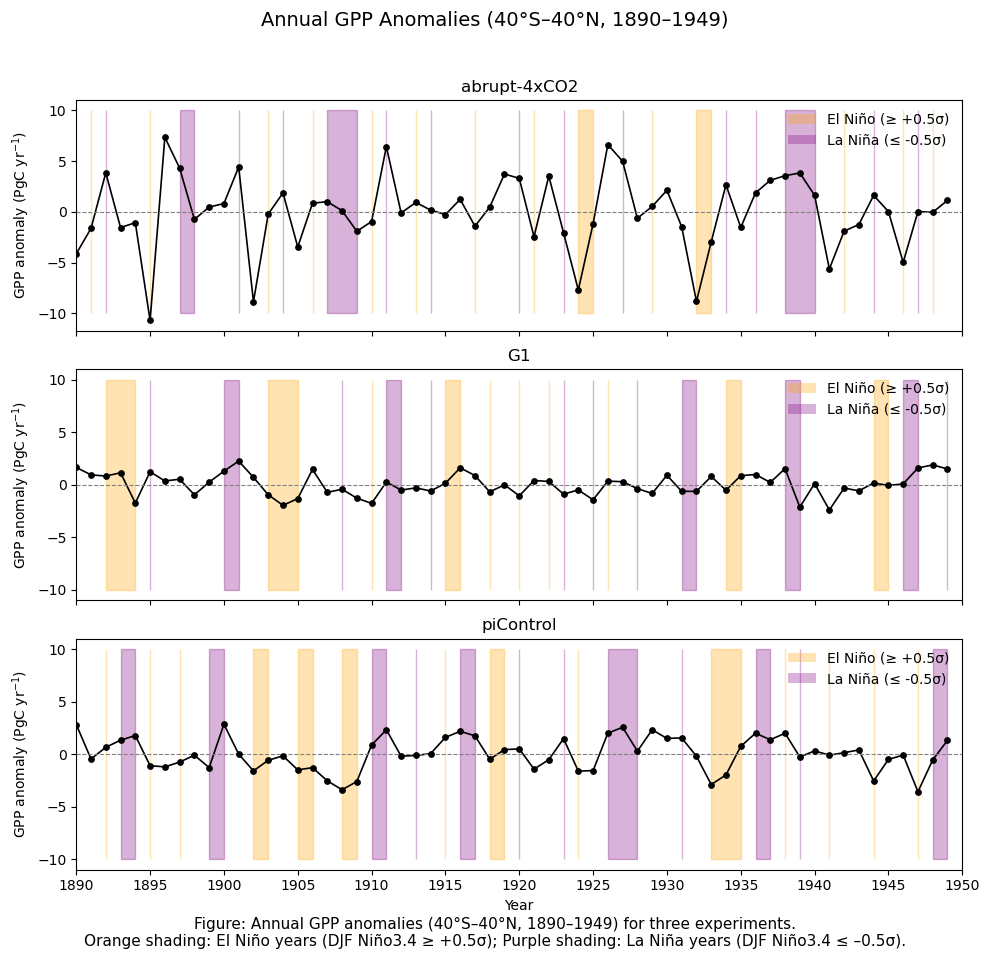

In [46]:
#  统一经纬度坐标命名  把经度范围从 [-180,180] 转换为 [0,360]

def standardize_coords(ds):
    if 'latitude' in ds.coords: ds = ds.rename({'latitude': 'lat'})
    if 'longitude' in ds.coords: ds = ds.rename({'longitude': 'lon'})
    if 'lon' in ds.coords and float(ds['lon'].min()) < 0:
        ds = ds.assign_coords(lon=(ds['lon'] % 360)).sortby('lon')
    return ds

# 确定逐个经纬度格点的面积数据 
def build_area_on_gpp_grid(area_path, gpp_ref_da):
    ds_area = xr.open_dataset(area_path)
    if 'area' not in ds_area.data_vars:
        if len(ds_area.data_vars) == 1:
            only = list(ds_area.data_vars)[0]
            ds_area = ds_area.rename({only: 'area'})
        else:
            raise KeyError('fsil find vars \'area\'')
    ds_area = standardize_coords(ds_area)
    area = ds_area['area'].sel(lat=LAT_SLICE)
    # 通过最近邻插值法，将面积与 GPP格点匹配
    area_matched = area.interp(lat=gpp_ref_da.lat, lon=gpp_ref_da.lon, method='nearest')
    return area_matched.broadcast_like(gpp_ref_da.isel(time=0))
# 计算年度 GPP 总量（PgC/yr）
def compute_annual_gpp_total(gpp_path, area_matched):
    ds = xr.open_dataset(gpp_path)
    ds = standardize_coords(ds)
    if 'gpp' not in ds.data_vars:
        only = list(ds.data_vars)[0]
        ds = ds.rename({only: 'gpp'})
    gpp = ds['gpp'].sel(lat=LAT_SLICE)

    area_use = area_matched.sel(lat=gpp.lat, lon=gpp.lon)
    area_use = xr.where(gpp.isel(time=0).isnull(), 0.0, area_use)
    # gpp 单位：kgC m^-2 s^-1
    # gppx每月天数 × 86400 (秒/天) → kgC x 每平方公里等于 1e6 (m²) 
    #  PgC (=10^12 kg)
    days_in_month = gpp['time'].dt.days_in_month
    monthly_total = (gpp * area_use * days_in_month * 86400).sum(('lat','lon')) * 1e-12 * 1e6
    annual_total = monthly_total.resample(time='YS').sum().sel(time=slice('1890','1949'))
    return annual_total

# ===== main =====
gpp_ref = xr.open_dataset(DATA_DIR / GPP_FILES['piControl'])['gpp']
area_ref = build_area_on_gpp_grid(AREA_FILE, gpp_ref)

GPP_totals = {}
for exp, fname in GPP_FILES.items():
    ann = compute_annual_gpp_total(DATA_DIR / fname, area_ref)
    GPP_totals[exp] = ann.values  # PgC/yr
years = ann['time.year'].values  # 共 60 年

# ===== draw picture =====
fig, axes = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

for i, (exp, gpp_vals) in enumerate(GPP_totals.items()):
    ax = axes[i]
    enso_vals = ENSO_index[i, :]   # each ENSO index

    # ENSO 指数 ≥ +0.5σ → El Niño（暖事件）
    # ENSO 指数 ≤ -0.5σ → La Niña（冷事件）
    ax.fill_between(years, -10, 10, where=enso_vals >= 0.5, color='orange', alpha=0.3)
    ax.fill_between(years, -10, 10, where=enso_vals <= -0.5, color='purple', alpha=0.3)

    # GPP year timeseries
    ax.plot(years, gpp_vals, color='black', linewidth=1.2)
    ax.scatter(years, gpp_vals, color='black', s=15, zorder=3)

    # y=0 刻度线
    ax.axhline(0, color='gray', linewidth=0.8, linestyle='--')

    ax.set_ylabel('GPP anomaly (PgC yr$^{-1}$)')
    ax.set_title(exp)

    # legend（ENSO）
    legend_handles = [
        Patch(facecolor='orange', alpha=0.3, label='El Niño (≥ +0.5σ)'),
        Patch(facecolor='purple', alpha=0.3, label='La Niña (≤ -0.5σ)')
    ]
    ax.legend(handles=legend_handles, loc='upper right', frameon=False)

axes[-1].set_xlabel('Year')
axes[-1].set_xlim(1890, 1950)
axes[-1].set_xticks(np.arange(1890, 1951, 5))

plt.tight_layout()


fig.suptitle('Annual GPP Anomalies (40°S–40°N, 1890–1949)', fontsize=14, y=1.02)
fig.subplots_adjust(top=0.92)

plt.figtext(
    0.5, -0.02,
    'Figure: Annual GPP anomalies (40°S–40°N, 1890–1949) for three experiments.\n'
    'Orange shading: El Niño years (DJF Niño3.4 ≥ +0.5σ); '
    'Purple shading: La Niña years (DJF Niño3.4 ≤ –0.5σ).',
    ha='center', fontsize=11
)

plt.savefig('GPP_anomalies_40S40N_1890-1949.png', dpi=300, bbox_inches='tight')
plt.show()


计算泛热带总gpp对enso敏感性

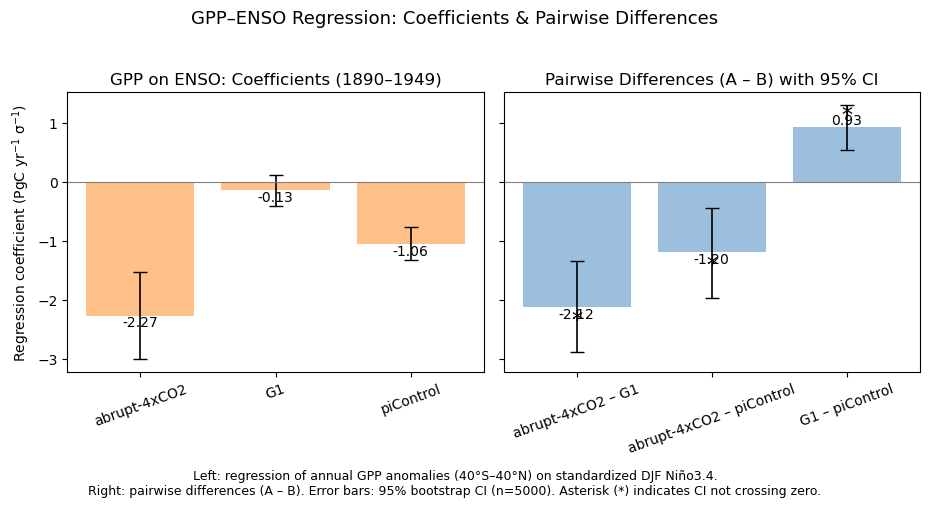

In [64]:

# —— 小工具：把数组整成想要的形状（更健壮） ——
def to_1d(a):
    #确保是一维向量 (n,)
    a = np.asarray(a, dtype=float)
    return a.reshape(-1)

def to_2xn(a):
    #确保维度是 (2, n)
    a = np.asarray(a, dtype=float)
    if a.ndim == 1:
        # 一维就变成 (2, n)；如果只有 n，就复制一份当对称误差
        a = np.vstack([a, a])
    elif a.shape[0] != 2 and a.shape[1] == 2:
        # 如果是 (n,2)，就转置一下
        a = a.T
    return a


coeff_vals = to_1d(betas)        #回归系数 (3个值)
coeff_yerr = to_2xn(yerr)        #  置信区间 (2x3矩阵)

diff_vals = to_1d(diff_means)    # 差异均值 (3个值)
diff_err  = to_2xn(diff_yerr)    # 差异置信区间 (2x3矩阵)

# 配色方案
colors_coeff = ['#FFB574', '#FFB574', '#FFB574']  # 3 实验 (浅橙色)
colors_diff  = ['#8CB4D9', '#8CB4D9', '#8CB4D9']  # 3 组差值 (浅蓝色)
# 创建并排的两个子图
fig, axes = plt.subplots(1, 2, figsize=(10, 4.8), sharey=True)  # 共享 y 轴，便于比较
axL, axR = axes

# 左图：三实验回归系数
barsL = axL.bar(
    exp_names, coeff_vals, yerr=coeff_yerr,
    color=colors_coeff, alpha=0.85, capsize=5, error_kw=dict(lw=1.2)
)
# 在柱顶写数值
for bar, val in zip(barsL, coeff_vals):
    axL.text(bar.get_x() + bar.get_width()/2, val,
             f'{val:.2f}', ha='center', va='bottom' if val>=0 else 'top', fontsize=10)

axL.axhline(0, color='gray', lw=0.8)
axL.set_title('GPP on ENSO: Coefficients (1890–1949)', fontsize=12)
axL.set_ylabel('Regression coefficient (PgC yr$^{-1}$ σ$^{-1}$)')
axL.tick_params(axis='x', labelrotation=20)

# 右图：配对差值
barsR = axR.bar(
    pair_labels, diff_vals, yerr=diff_err,
    color=colors_diff, alpha=0.85, capsize=5, error_kw=dict(lw=1.2)
)
# 柱顶数值 & 显著性星号
for i, bar in enumerate(barsR):
    y = bar.get_height()
    axR.text(bar.get_x() + bar.get_width()/2, y,
             f'{y:.2f}', ha='center', va='bottom' if y>=0 else 'top', fontsize=10)
    if bool(diff_sig[i]):  # CI 不跨 0 → 标星
        axR.text(bar.get_x() + bar.get_width()/2, y + (0.02 if y>=0 else -0.02),
                 '*', ha='center', va='bottom' if y>=0 else 'top', fontsize=16, color='black')

axR.axhline(0, color='gray', lw=0.8)
axR.set_title('Pairwise Differences (A – B) with 95% CI', fontsize=12)
axR.tick_params(axis='x', labelrotation=20)


plt.suptitle('GPP–ENSO Regression: Coefficients & Pairwise Differences', y=0.98, fontsize=13)

plt.figtext(
    0.5, -0.03,
    'Left: regression of annual GPP anomalies (40°S–40°N) on standardized DJF Niño3.4.\n'
    'Right: pairwise differences (A – B). Error bars: 95% bootstrap CI (n=5000). '
    'Asterisk (*) indicates CI not crossing zero.',
    ha='center', fontsize=9
)

plt.tight_layout(rect=[0.04, 0.02, 0.98, 0.95])
plt.savefig('GPP_ENSO_regression_coeffs_and_differences_side_by_side.png', dpi=300, bbox_inches='tight')
plt.show()


计算各实验组GPP与ENSO指数的空间回归系数

In [48]:
# 读取逐个格点的逐月GPP，并转换为年累计值

DATA_DIR = Path(r'D:\cangku\data')
GPP_FILES = {
    'abrupt-4xCO2': 'gpp_Lmon_CanESM5_abrupt-4xCO2_r1i1p2f1_gn_185001-200012_1x1_1890-1949_detrend.nc',
    'G1':           'gpp_Lmon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc',
    'piControl':    'gpp_Lmon_CanESM5_piControl_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc',
}
LAT_SLICE = slice(-40, 40)

def _std_coords(ds):
    if 'latitude' in ds.coords:  ds = ds.rename({'latitude':'lat'})
    if 'longitude' in ds.coords: ds = ds.rename({'longitude':'lon'})
    if 'lon' in ds.coords and float(ds['lon'].min()) < 0:
        ds = ds.assign_coords(lon=(ds['lon'] % 360)).sortby('lon')
    return ds    #返回年累计GPP场数据 (time=60, lat, lon), 单位 kgC m^-2 yr^-1

def compute_annual_gpp_field(gpp_path: Path):
    #month gpp(kgC m^-2 s^-1) → year all gpp(kgC m^-2 yr^-1)，1890–1949
    ds = xr.open_dataset(gpp_path)
    ds = _std_coords(ds)
    var = 'gpp' if 'gpp' in ds.data_vars else list(ds.data_vars)[0]
    gpp = ds[var].sel(lat=LAT_SLICE)  # (time, lat, lon), kgC m^-2 s^-1（detrend）
    days = gpp['time'].dt.days_in_month
    # integrate month → year
    gpp_annual = (gpp * days * 86400).resample(time='YS').sum().sel(time=slice('1890','1949'))
    return gpp_annual.astype('float32')  # (60, lat, lon)

# every expirment every grid annul GPP
GPP_annual = {}
for exp, fname in GPP_FILES.items():
    da = compute_annual_gpp_field(DATA_DIR / fname)
    print(f'{exp}: shape={da.shape}, years={int(da.time.dt.year.min())}-{int(da.time.dt.year.max())}')
    GPP_annual[exp] = da

# 检查ENSO指数数据（确保后续ENSO与gpp数据长度一致，进而计算敏感性）
print('ENSO_index shape:', ENSO_index.shape)  # 期待 (3, 60)


abrupt-4xCO2: shape=(60, 81, 360), years=1890-1949
G1: shape=(60, 81, 360), years=1890-1949
piControl: shape=(60, 81, 360), years=1890-1949
ENSO_index shape: (3, 60)


[abrupt-4xCO2] beta: min=-0.300, max=0.141
[G1] beta: min=-0.159, max=0.260
[piControl] beta: min=-0.163, max=0.215


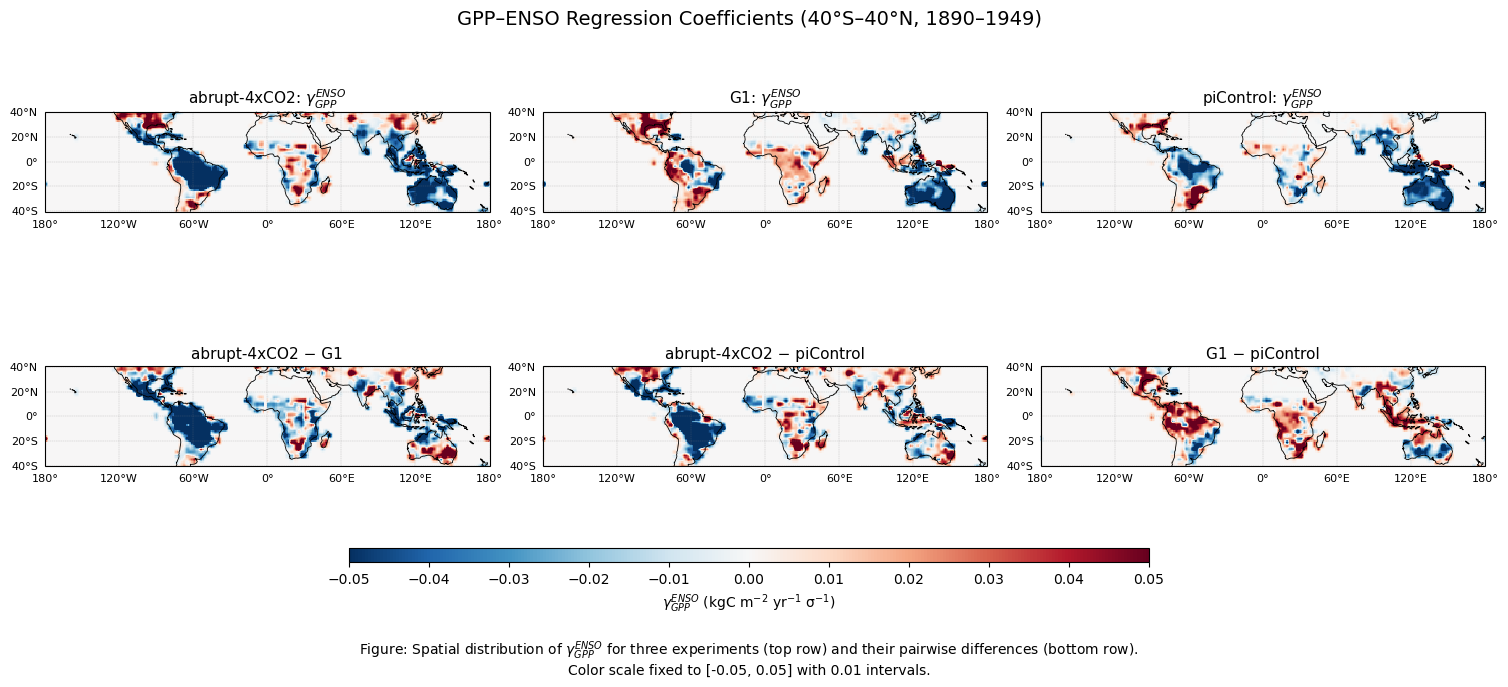

In [49]:
#计算逐个格点的GPP与ENSO指数的回归系数（敏感性）
exp_order = ['abrupt-4xCO2', 'G1', 'piControl']

def regression_coef(x, y):
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() > 1:
        return np.cov(x[mask], y[mask], ddof=1)[0, 1] / np.var(x[mask], ddof=1)
    return np.nan

# 义回归计算公式
# x - 自变量（ENSO指数）
# y - 因变量（GPP场）
# 回归系数（cov(x,y)/var(x)）
def grid_regression_quick(gpp_annual_da, enso_series):
    gpp = gpp_annual_da.values
    t, nlat, nlon = gpp.shape
    betas = np.full((nlat, nlon), np.nan, dtype='float32')
    for i in range(nlat):
        for j in range(nlon):
            y = gpp[:, i, j]
            if np.all(np.isnan(y)): 
                continue
            betas[i, j] = regression_coef(enso_series, y)
    return betas

# 3 experiment regress
beta_maps = {}
for i, exp in enumerate(exp_order):
    betas = grid_regression_quick(GPP_annual[exp], ENSO_index[i, :])
    beta_maps[exp] = betas
    print(f'[{exp}] beta: min={np.nanmin(betas):.3f}, max={np.nanmax(betas):.3f}')

# ===== 2) 3 differences experiment regress
diff_pairs = [('abrupt-4xCO2', 'G1'),
              ('abrupt-4xCO2', 'piControl'),
              ('G1', 'piControl')]
diff_maps = {f'{A}-{B}': beta_maps[A] - beta_maps[B] for (A, B) in diff_pairs}

# ===== 3) color bar =====
vmin, vmax = -0.05, 0.05
cbar_ticks = np.arange(-0.05, 0.051, 0.01)

# ===== 4) draw picture =====
fig, axes = plt.subplots(2, 3, figsize=(16, 7),
                         subplot_kw={'projection': ccrs.PlateCarree()})

titles = [
    r'abrupt-4xCO2: $\gamma_{GPP}^{ENSO}$',
    r'G1: $\gamma_{GPP}^{ENSO}$',
    r'piControl: $\gamma_{GPP}^{ENSO}$',
    r'abrupt-4xCO2 − G1',
    r'abrupt-4xCO2 − piControl',
    r'G1 − piControl'
]

def plot_panel(ax, field, lats, lons, title, vmin, vmax):
    im = ax.pcolormesh(lons, lats, field, cmap='RdBu_r',
                       vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.6)
    # add lat lon
    gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size':8}
    gl.ylabel_style = {'size':8}
    ax.set_title(title, fontsize=11)
    return im

# top 3 experiment 
for col, exp in enumerate(exp_order):
    im = plot_panel(axes[0, col], beta_maps[exp],
                    GPP_annual[exp].lat.values, GPP_annual[exp].lon.values,
                    titles[col], vmin, vmax)

# bottom 3 differences
for col, key in enumerate([f'{a}-{b}' for (a, b) in diff_pairs]):
    im = plot_panel(axes[1, col], diff_maps[key],
                    GPP_annual[exp_order[0]].lat.values, GPP_annual[exp_order[0]].lon.values,
                    titles[3+col], vmin, vmax)

# colorbar
cbar_ax = fig.add_axes([0.25, 0.17, 0.5, 0.02])
cb = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks=cbar_ticks)
cb.set_label(r'$\gamma_{GPP}^{ENSO}$ (kgC m$^{-2}$ yr$^{-1}$ σ$^{-1}$)')

# title 
fig.suptitle('GPP–ENSO Regression Coefficients (40°S–40°N, 1890–1949)', fontsize=14, y=0.96)
plt.figtext(0.5, 0.01,
    r'Figure: Spatial distribution of $\gamma_{GPP}^{ENSO}$ for three experiments (top row) '
    'and their pairwise differences (bottom row).\n'
    'Color scale fixed to [-0.05, 0.05] with 0.01 intervals.',
    ha='center', fontsize=10)

# plot
plt.subplots_adjust(left=0.06, right=0.96, top=0.90, bottom=0.22,
                    wspace=0.12, hspace=0.15)

plt.savefig('GPP_ENSO_regression_maps_final.png', dpi=300)
plt.show()


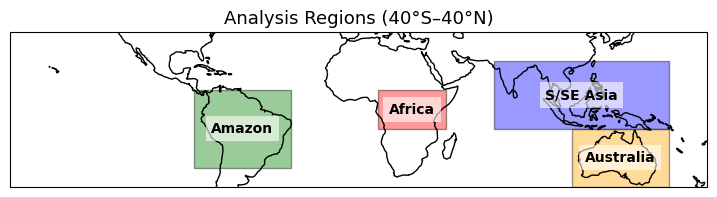

In [50]:
# 四个典型地理区域
regions_demo = {
    'Amazon':     {'lat': (-30, 10),  'lon': (275, 325), 'color': 'green'},   # 亚马逊雨林区域
    'Africa':     {'lat': (-10, 10), 'lon': (10, 45),   'color': 'red'},      # 非洲赤道区域
    'S/SE Asia':  {'lat': (-10, 25), 'lon': (70, 160),  'color': 'blue'},     #南亚/东南亚区域
    'Australia':  {'lat': (-40, -10),  'lon': (110, 160), 'color': 'orange'}, # 澳大利亚大陆
}

fig = plt.figure(figsize=(9, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([1e-3, 359.999, -40, 40], crs=ccrs.PlateCarree())
ax.coastlines()

# plot area
for name, b in regions_demo.items():
    lat1, lat2 = b['lat']
    lon1, lon2 = b['lon']
    rect = Rectangle(
        (lon1, lat1), lon2 - lon1, lat2 - lat1,
        linewidth=1, edgecolor='k', facecolor=b['color'], alpha=0.4,
        transform=ccrs.PlateCarree()
    )
    ax.add_patch(rect)
    ax.text((lon1+lon2)/2, (lat1+lat2)/2, name,
            ha='center', va='center', fontsize=10, weight='bold',
            transform=ccrs.PlateCarree(),
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.title('Analysis Regions (40°S–40°N)', fontsize=13)
plt.savefig('GPP_ENSO_regions_demo.png', dpi=300, bbox_inches='tight')
plt.show()


**计算逐年气温(tas)对ENSO的敏感性，逐年降水(pr)对ENSO的敏感性**


In [51]:
#将月尺度气温(tas)和降水(pr)数据转为年平均值(1890-1949)


import xarray as xr
import numpy as np
from pathlib import Path

# ===============================
# paths
# ===============================
DATA_DIR = Path(r'D:\cangku\data')

TAS_FILES = {
    'abrupt-4xCO2': 'tas_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1_1890-1949_detrend.nc',
    'G1':           'tas_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc',
}

PR_FILES = {
    'abrupt-4xCO2': 'pr_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1_1890-1949_detrend.nc',
    'G1':           'pr_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend.nc',
}

LAT_SLICE = slice(-40, 40)

# ===============================
# helper
# ===============================
def _std_coords(ds):
    '''standardize lat/lon naming'''
    if 'latitude' in ds.coords:
        ds = ds.rename({'latitude': 'lat'})
    if 'longitude' in ds.coords:
        ds = ds.rename({'longitude': 'lon'})
    if 'lon' in ds.coords and float(ds['lon'].min()) < 0:
        ds = ds.assign_coords(lon=(ds['lon'] % 360)).sortby('lon')
    return ds


def compute_annual_mean_field(path: Path, varname: str):
    '''
    Convert monthly (time,lat,lon) to annual mean (time=60, lat, lon)
    for 1890–1949
    '''
    ds = xr.open_dataset(path)
    ds = _std_coords(ds)

    # identify variable
    if varname not in ds.data_vars:
        varname = list(ds.data_vars)[0]
    da = ds[varname].sel(lat=LAT_SLICE)

    # convert to annual mean
    annual = da.resample(time='YS').mean().sel(time=slice('1890', '1949'))
    annual = annual.astype('float32')

    ds.close()
    return annual


# ===============================
# main
# ===============================
def process_and_save(file_dict, varname):
    for exp, fname in file_dict.items():
        in_path = DATA_DIR / fname
        da_ann = compute_annual_mean_field(in_path, varname)
        out_name = fname.replace('.nc', '_annual_1890-1949.nc')
        out_path = DATA_DIR / out_name
        da_ann.to_netcdf(out_path)
        print(f'[finish] {varname} annual mean saved → {out_path.name}, shape={da_ann.shape}')


if __name__ == '__main__':
    process_and_save(TAS_FILES, 'tas')
    process_and_save(PR_FILES, 'pr')
    print('=== all finished ===')


[finish] tas annual mean saved → tas_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1_1890-1949_detrend_annual_1890-1949.nc, shape=(60, 81, 360)
[finish] tas annual mean saved → tas_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend_annual_1890-1949.nc, shape=(60, 81, 360)
[finish] pr annual mean saved → pr_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1_1890-1949_detrend_annual_1890-1949.nc, shape=(60, 81, 360)
[finish] pr annual mean saved → pr_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend_annual_1890-1949.nc, shape=(60, 81, 360)
=== all finished ===


In [53]:
#计算降水和气温对ENSO的响应系数(β，贝塔)及实验组间差异  
#β(variable, ENSO) 表示单位ENSO变化(1σ)引起的降水、气温变化量

# ======================
# Directory & file names
# ======================
DATA_DIR = Path(r'D:\cangku\data')

PR_ANNUAL_FILES = {
    'abrupt-4xCO2': 'pr_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1_1890-1949_detrend_annual_1890-1949.nc',
    'G1':           'pr_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend_annual_1890-1949.nc',
}

TAS_ANNUAL_FILES = {
    'abrupt-4xCO2': 'tas_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1_1890-1949_detrend_annual_1890-1949.nc',
    'G1':           'tas_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend_annual_1890-1949.nc',
}
# 定义函数计算回归系数（β）
# x - 自变量 (ENSO指数)  y - 因变量 (气候变量)
def regression_coef(x, y):
    '''simple OLS slope β = cov(x,y)/var(x)'''
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() > 1:
        return np.cov(x[mask], y[mask], ddof=1)[0, 1] / np.var(x[mask], ddof=1)
    return np.nan

# 定义全网格快速回归计算函数（提高计算效率）
def grid_regression_quick(var_da, enso_series):
    '''Apply regression at each grid point'''
    arr = var_da.values
    t, nlat, nlon = arr.shape
    betas = np.full((nlat, nlon), np.nan, dtype='float32')
    for i in range(nlat):
        for j in range(nlon):
            y = arr[:, i, j]
            if np.all(np.isnan(y)):
                continue
            betas[i, j] = regression_coef(enso_series, y)
    return betas


# ======================
# Compute β fields
# ======================
def compute_sensitivity(var_name, file_dict, enso_indices):
    betas = {}
    for exp, path_name in file_dict.items():
        ds = xr.open_dataset(DATA_DIR / path_name)
        da = ds[var_name].astype('float64')
        # experiment index: 0 for abrupt4xCO2, 1 for G1
        idx = 0 if exp == 'abrupt-4xCO2' else 1
        enso = enso_indices[idx, :]
        betas[exp] = xr.DataArray(
            grid_regression_quick(da, enso),
            coords={'lat': da.lat, 'lon': da.lon},
            dims=('lat', 'lon'),
            name=f'beta_{var_name}_{exp}',
            attrs={
                'description': f'Regression coefficient β({var_name}, ENSO) for {exp}',
                'units': f'{da.attrs.get("units", "")} per σ(ENSO)'
            }
        )
        ds.close()
        print(f'[finish] {var_name}–ENSO regression for {exp}')
    return betas


# ---- compute β(pr) & β(tas) ----
beta_pr = compute_sensitivity('pr', PR_ANNUAL_FILES, ENSO_index)
beta_tas = compute_sensitivity('tas', TAS_ANNUAL_FILES, ENSO_index)


# ---- compute G1 − abrupt4xCO2 differences ----
beta_pr_diff = beta_pr['G1'] - beta_pr['abrupt-4xCO2']
beta_pr_diff.name = 'beta_pr_G1_minus_abrupt4xCO2'
beta_pr_diff.attrs['description'] = 'Difference in pr–ENSO sensitivity (G1 − abrupt-4xCO2)'

beta_tas_diff = beta_tas['G1'] - beta_tas['abrupt-4xCO2']
beta_tas_diff.name = 'beta_tas_G1_minus_abrupt4xCO2'
beta_tas_diff.attrs['description'] = 'Difference in tas–ENSO sensitivity (G1 − abrupt-4xCO2)'


# ======================
# Save results
# ======================
out_ds = xr.Dataset(
    {
        'beta_pr_abrupt4xCO2': beta_pr['abrupt-4xCO2'],
        'beta_pr_G1': beta_pr['G1'],
        'beta_pr_diff_G1_minus_abrupt4xCO2': beta_pr_diff,
        'beta_tas_abrupt4xCO2': beta_tas['abrupt-4xCO2'],
        'beta_tas_G1': beta_tas['G1'],
        'beta_tas_diff_G1_minus_abrupt4xCO2': beta_tas_diff,
    },
    attrs={
        'title': 'ENSO sensitivity of pr and tas (1890–1949)',
        'description': 'Regression slope β(variable, ENSO) for abrupt-4xCO2, G1, and their difference',
        'note': 'ENSO index standardized DJF Niño3.4 (60-year, 1890–1949)'
    }
)

out_path = DATA_DIR / 'ENSO_sensitivity_pr_tas_G1_abrupt4xCO2.nc'
out_ds.to_netcdf(out_path)
print(f'[saved] {out_path}')


[finish] pr–ENSO regression for abrupt-4xCO2
[finish] pr–ENSO regression for G1
[finish] tas–ENSO regression for abrupt-4xCO2
[finish] tas–ENSO regression for G1
[saved] D:\cangku\data\ENSO_sensitivity_pr_tas_G1_abrupt4xCO2.nc


* 量化GPP对气候因子的敏感性（控制其他变量后的独立影响）*

In [55]:
# GPP对气温(tas)和降水(pr)的偏回归系数

#  ΔGPP = γ_T * Δtas + γ_P * Δpr + ε
#  γ_GPP^T  - 温度敏感性系数（控制降水影响后）
#  γ_GPP^P  - 降水敏感性系数（控制温度影响后）
#  Δγ_GPP^T - G1与abrupt-4xCO2实验的γ_T差异
#  Δγ_GPP^P - G1与abrupt-4xCO2实验的γ_P差异
# ====== 文件路径 ======
DATA_DIR = Path(r'D:\cangku\data')

TAS_ANNUAL_FILES = {
    'abrupt-4xCO2': 'tas_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1_1890-1949_detrend_annual_1890-1949.nc',
    'G1':           'tas_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend_annual_1890-1949.nc',
}
PR_ANNUAL_FILES = {
    'abrupt-4xCO2': 'pr_Amon_CanESM5_abrupt-4xCO2_185001-200012_1x1_1890-1949_detrend_annual_1890-1949.nc',
    'G1':           'pr_Amon_CanESM5_G1_r1i1p2f1_gn_185001-194912_1x1_1890-1949_detrend_annual_1890-1949.nc',
}

LAT_SLICE = slice(-40, 40)

# 定义偏回归计算函数
def multiple_regression_coeffs(y, x1, x2):

    #  y  - 因变量 (GPP anomalies)
    #  x1 - 自变量1 (temperature)
    #  x2 - 自变量2 (precipitation)
    #  通过最小二乘法求解
    mask = np.isfinite(y) & np.isfinite(x1) & np.isfinite(x2)
    if mask.sum() < 3:
        return np.nan, np.nan
    X = np.stack([x1[mask], x2[mask]], axis=1)
    X = np.column_stack((np.ones(X.shape[0]), X))  # 加截距项
    yv = y[mask]
    beta, _, _, _ = np.linalg.lstsq(X, yv, rcond=None)
    return beta[1], beta[2]  # 返回γ_GPP^T和γ_GPP^P


#定义全网格快速偏回归计算函数（提高计算效率）
def grid_partial_regression(gpp_da, tas_da, pr_da):
    '''对每个格点计算偏回归系数 γ_GPP^T, γ_GPP^P'''
    gpp = gpp_da.values
    tas = tas_da.values
    pr = pr_da.values
    t, nlat, nlon = gpp.shape

    beta_T = np.full((nlat, nlon), np.nan, dtype='float32')
    beta_P = np.full((nlat, nlon), np.nan, dtype='float32')

    for i in range(nlat):
        for j in range(nlon):
            y = gpp[:, i, j]
            x1 = tas[:, i, j]
            x2 = pr[:, i, j]
            if np.all(np.isnan(y)) or np.all(np.isnan(x1)) or np.all(np.isnan(x2)):
                continue
            bT, bP = multiple_regression_coeffs(y, x1, x2)
            beta_T[i, j] = bT
            beta_P[i, j] = bP
    return beta_T, beta_P

# ========== 主计算 ==========
results = {}

for exp in ['abrupt-4xCO2', 'G1']:
    # === GPP 直接来自内存 ===
    gpp_da = GPP_annual[exp].sel(lat=LAT_SLICE)
    # === tas, pr 从文件读取 ===
    ds_tas = xr.open_dataset(DATA_DIR / TAS_ANNUAL_FILES[exp])
    ds_pr  = xr.open_dataset(DATA_DIR / PR_ANNUAL_FILES[exp])
    tas_da = ds_tas['tas'].sel(lat=LAT_SLICE)
    pr_da  = ds_pr['pr'].sel(lat=LAT_SLICE)

    print(f'[start] Computing γ_GPP^T & γ_GPP^P for {exp} ...')
    bT, bP = grid_partial_regression(gpp_da, tas_da, pr_da)

    results[f'gamma_GPP_T_{exp}'] = xr.DataArray(
        bT, coords={'lat': gpp_da.lat, 'lon': gpp_da.lon},
        dims=('lat', 'lon'),
        attrs={'description': f'GPP sensitivity to temperature for {exp}',
               'units': 'kgC m^-2 yr^-1 °C^-1'}
    )
    results[f'gamma_GPP_P_{exp}'] = xr.DataArray(
        bP, coords={'lat': gpp_da.lat, 'lon': gpp_da.lon},
        dims=('lat', 'lon'),
        attrs={'description': f'GPP sensitivity to precipitation for {exp}',
               'units': 'kgC m^-2 yr^-1 (kg m^-2 s^-1)^-1'}
    )

    ds_tas.close(); ds_pr.close()
    print(f'[finish] {exp}: γ_T ({np.nanmin(bT):.3f}, {np.nanmax(bT):.3f}), '
          f'γ_P ({np.nanmin(bP):.3f}, {np.nanmax(bP):.3f})')

#  G1-4xCO2试验的差值 (Δγ_GPP^T, Δγ_GPP^P)
results['gamma_GPP_T_diff_G1_minus_abrupt4xCO2'] = (
    results['gamma_GPP_T_G1'] - results['gamma_GPP_T_abrupt-4xCO2']
)
results['gamma_GPP_P_diff_G1_minus_abrupt4xCO2'] = (
    results['gamma_GPP_P_G1'] - results['gamma_GPP_P_abrupt-4xCO2']
)

# ========== 保存 ==========
out_ds = xr.Dataset(
    results,
    attrs={
        'title': 'GPP sensitivity to temperature and precipitation (1890–1949)',
        'note': 'γ_GPP^T and γ_GPP^P estimated via multiple regression: GPP = a*T + b*P + ε'
    }
)

out_path = DATA_DIR / 'GPP_TP_partial_sensitivity_G1_abrupt4xCO2.nc'
out_ds.to_netcdf(out_path)
print(f'[saved] {out_path}')


[start] Computing γ_GPP^T & γ_GPP^P for abrupt-4xCO2 ...
[finish] abrupt-4xCO2: γ_T (-0.673, 0.795), γ_P (-63037.961, 59136.113)
[start] Computing γ_GPP^T & γ_GPP^P for G1 ...
[finish] G1: γ_T (-0.822, 0.742), γ_P (-19794.533, 71912.812)
[saved] D:\cangku\data\GPP_TP_partial_sensitivity_G1_abrupt4xCO2.nc


**ENSO-GPP敏感性分解
展示G1与abrupt-4xCO2实验中，GPP对ENSO响应差异(Δγ)的组分分解**

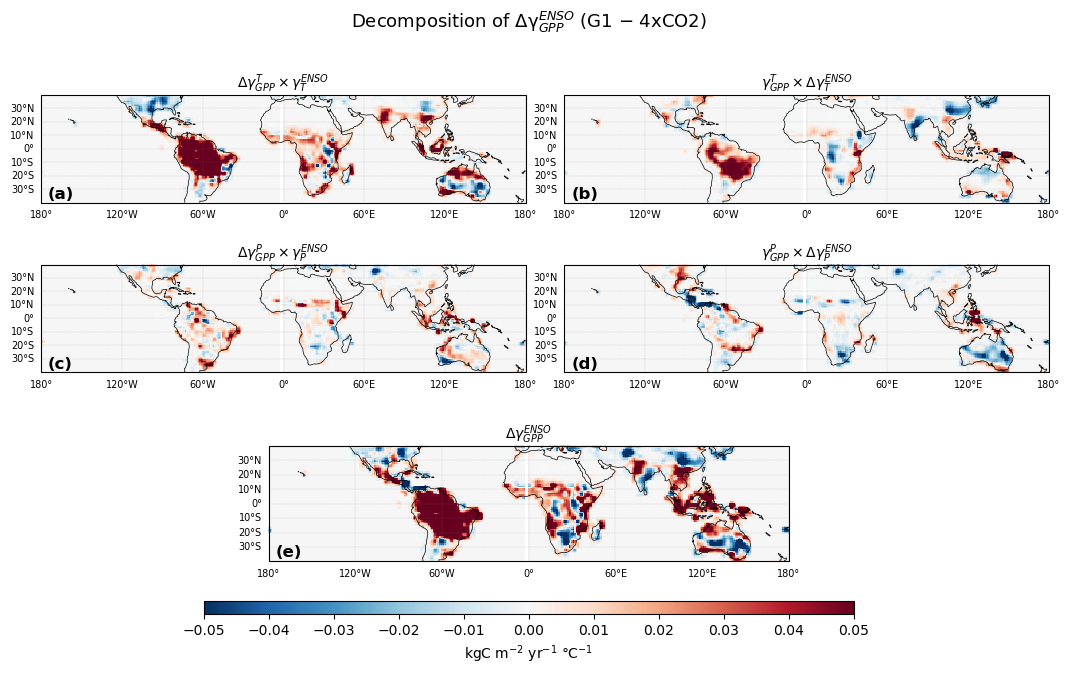

In [56]:

'''
Publication layout version (perfectly aligned)
Decomposition of Δγ_GPP^ENSO (G1 − 4xCO2)
→ (a–d): 2x2 grid
→ (e): centered bottom row, same size as others
→ consistent panel size, extent = 40°S–40°N
'''

# ======== 文件路径 ========
DATA_DIR = r'D:\cangku\data'
file_gpp_tp = f'{DATA_DIR}\\GPP_TP_partial_sensitivity_G1_abrupt4xCO2.nc'
file_enso_tp = f'{DATA_DIR}\\ENSO_sensitivity_pr_tas_G1_abrupt4xCO2.nc'

# ======== 读取数据 ========
ds_gpp = xr.open_dataset(file_gpp_tp)
ds_enso = xr.open_dataset(file_enso_tp)

# 提取变量 
# GPP对温度的敏感性
γGPP_T_G1  = ds_gpp['gamma_GPP_T_G1']
γGPP_T_4x  = ds_gpp['gamma_GPP_T_abrupt-4xCO2']
ΔγGPP_T    = ds_gpp['gamma_GPP_T_diff_G1_minus_abrupt4xCO2']

# GPP对降水的敏感性
γGPP_P_G1  = ds_gpp['gamma_GPP_P_G1']
γGPP_P_4x  = ds_gpp['gamma_GPP_P_abrupt-4xCO2']
ΔγGPP_P    = ds_gpp['gamma_GPP_P_diff_G1_minus_abrupt4xCO2']
# 气温对ENSO的敏感性
γT_ENSO_G1  = ds_enso['beta_tas_G1']
γT_ENSO_4x  = ds_enso['beta_tas_abrupt4xCO2']
ΔγT_ENSO    = ds_enso['beta_tas_diff_G1_minus_abrupt4xCO2']
# 降水对ENSO的敏感性
γP_ENSO_G1  = ds_enso['beta_pr_G1']
γP_ENSO_4x  = ds_enso['beta_pr_abrupt4xCO2']
ΔγP_ENSO    = ds_enso['beta_pr_diff_G1_minus_abrupt4xCO2']

# 敏感性分解计算 
term_a = ΔγGPP_T * γT_ENSO_4x  #GPP对温度敏感性的变化对总差异的贡献
term_b = γGPP_T_4x * ΔγT_ENSO  #温度对ENSO敏感性的变化对总差异的贡献
term_c = ΔγGPP_P * γP_ENSO_4x  #GPP对降水敏感性的变化对总差异的贡献
term_d = γGPP_P_4x * ΔγP_ENSO  #降水对ENSO敏感性的变化对总差异的贡献
term_e = term_a + term_b + term_c + term_d

# ======== 修复经度缝隙 ========
def close_longitude(da):
    lon_vals = da.lon.values
    dlon = np.diff(lon_vals).mean()
    new_lon = np.append(lon_vals, lon_vals[-1] + dlon)
    da_ext = xr.concat([da, da.isel(lon=0)], dim='lon')
    da_ext = da_ext.assign_coords(lon=new_lon)
    return da_ext

# ======== 绘图函数 ========
def plot_panel(ax, da, title, letter):
    da_ext = close_longitude(da)
    im = ax.pcolormesh(
        da_ext.lon, da_ext.lat, da_ext,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r', vmin=-0.05, vmax=0.05, shading='auto'
    )
    ax.coastlines(linewidth=0.5)
    ax.set_extent([-180, 180, -40, 40], crs=ccrs.PlateCarree())
    ax.set_title(title, fontsize=10, pad=2)
    ax.text(-175, -37, f'({letter})', fontsize=12, fontweight='bold')
    gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.4, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size':7}
    gl.ylabel_style = {'size':7}
    return im

# ======== 布局设计：使用 GridSpec 精准对齐 ========
fig = plt.figure(figsize=(13, 6.5))
proj = ccrs.PlateCarree()

# GridSpec：三行两列，底行占中间一格，保持相同尺寸
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1], figure=fig)
gs.update(wspace=0.08, hspace=0.05)

axes = [
    fig.add_subplot(gs[0, 0], projection=proj),  # (a)
    fig.add_subplot(gs[0, 1], projection=proj),  # (b)
    fig.add_subplot(gs[1, 0], projection=proj),  # (c)
    fig.add_subplot(gs[1, 1], projection=proj),  # (d)
]

# 底部子图（e）局中且与上方同宽
left = 0.30
bottom = 0.08
width = 0.40
height = 0.26
ax_e = fig.add_axes([left, bottom, width, height], projection=proj)
axes.append(ax_e)

# ======== 标题与数据 ========
titles = [
    r'$\Delta \gamma_{GPP}^T \times \gamma_T^{ENSO}$',
    r'$\gamma_{GPP}^T \times \Delta \gamma_T^{ENSO}$',
    r'$\Delta \gamma_{GPP}^P \times \gamma_P^{ENSO}$',
    r'$\gamma_{GPP}^P \times \Delta \gamma_P^{ENSO}$',
    r'$\Delta \gamma_{GPP}^{ENSO}$'
]
letters = ['a', 'b', 'c', 'd', 'e']
fields = [term_a, term_b, term_c, term_d, term_e]

for ax, da, t, l in zip(axes, fields, titles, letters):
    im = plot_panel(ax, da, t, l)

# ======== 颜色条 ========
cbar_ax = fig.add_axes([0.25, 0.04, 0.5, 0.02])
cb = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks=np.arange(-0.05, 0.051, 0.01))
cb.set_label(r'kgC m$^{-2}$ yr$^{-1}$ °C$^{-1}$', fontsize=10)

plt.suptitle('Decomposition of Δγ$_{GPP}^{ENSO}$ (G1 − 4xCO2)', fontsize=13, y=0.97)
plt.savefig('Delta_gamma_GPP_ENSO_decomposition_equal_panels.png', dpi=400, bbox_inches='tight')
plt.show()
